In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read csv file
df = pd.read_csv('data/iris_dump.csv', header=None)
#remove first row
df = df.iloc[1:]
#change data type to float
df = df.astype(float)
#table dimensions
col_count = df.shape[1]
#add column names
for i in range(col_count):
    df.rename(columns={i: 'X'+str(i)}, inplace=True)


df


,X0,X1,X2,X3
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [3]:
#number of clusters
k = 3

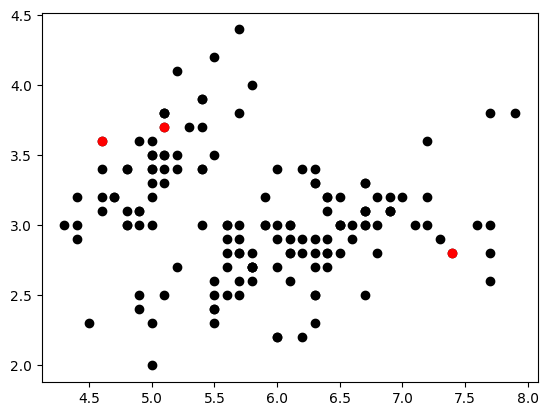

In [4]:
#choose random centroids and delete them from the dataset
centroids = df.sample(n=k)
df_samp = df.drop(centroids.index)


#plot data
plt.scatter(df['X0'], df['X1'], c='black')
plt.scatter(centroids['X0'], centroids['X1'], c='red')
plt.show()

In [5]:
# n dimensional eclidian distance
def distance(x, y):
    return sum([(x[i]-y[i])**2 for i in range(len(x))])**0.5

In [6]:
#assign each point to the closest centroid
def assign(df, centroids):
    k = centroids.shape[0]
    df['cluster'] = df.apply(lambda x: np.argmin([distance(x, centroids.iloc[i]) for i in range(k)]), axis=1)
    return df

In [7]:
assign(df_samp, centroids)


,X0,X1,X2,X3,cluster
1,5.1,3.5,1.4,0.2,2
2,4.9,3.0,1.4,0.2,2
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,1
147,6.3,2.5,5.0,1.9,1
148,6.5,3.0,5.2,2.0,1
149,6.2,3.4,5.4,2.3,1


In [8]:
centroids_new = df_samp.groupby('cluster').mean()
centroids_new

,X0,X1,X2,X3
cluster,,,,
0,4.591667,3.041667,1.333333,0.208333
1,6.362500,2.920455,5.057955,1.744318
2,5.200000,3.297872,2.000000,0.455319


In [9]:
#calculate new centroids
centroids_new = df_samp.groupby('cluster').mean()
#check if centroids changed
if centroids.equals(centroids_new):
    centroids_new
    print('Centroids did not change')
#update centroids
centroids = centroids_new
#assign points to new centroids
df_samp = assign(df_samp, centroids)




IndexError: index 4 is out of bounds for axis 0 with size 4

In [ ]:
while True:
    #calculate new centroids
    centroids_new = df_samp.groupby('cluster').mean()
    #check if centroids changed
    if centroids.equals(centroids_new):
        centroids_new
        break
    #update centroids
    centroids = centroids_new
    assign(df_samp, centroids)
    

In [ ]:
#plot data
plt.scatter(df_samp['X0'], df_samp['X1'], c=df_samp['cluster'])
plt.scatter(centroids['X0'], centroids['X1'], c='red')
plt.show()
